In [67]:
# !pip install langgraph

In [68]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [69]:
class AgentState(TypedDict):
    number1: int
    operator: str
    number2: int
    number3: int
    operator2: str
    number4: int
    final_number: int
    final_number2: int


In [70]:
def addition(state : AgentState)->AgentState:
  "this node adds the two numbers "
  state["final_number"]=state["number1"]+state["number2"]
  return state
def subtraction(state:AgentState)->AgentState:
  "this node subtracts the two numbers"
  state["final_number"]=state["number1"]-state["number2"]
  return state


def decide_next_node(state:AgentState)->AgentState:
  "this node selects the next node in the graph"
  if state["operator"] == "+":
    return "addition_operator"
  elif state["operator"] == "-":
    return "subtraction_operator"

def addition2(state : AgentState)->AgentState:
  "this node adds the two numbers "
  state["final_number2"]=state["number3"]+state["number4"]
  return state
def subtraction2(state:AgentState)->AgentState:
  "this node subtracts the two numbers"
  state["final_number2"]=state["number3"]-state["number4"]
  return state

def decide_next_node2(state:AgentState)->AgentState:
  "this node selects the next node in the graph"
  if state["operator2"] == "+":
    return "addition_operator2"
  elif state["operator2"] == "-":
    return "subtraction_operator2"

In [71]:
graph = StateGraph(AgentState)
graph.add_node("add_node",addition)
graph.add_node("subtract_node",subtraction)
graph.add_node("router",lambda state:state)  #passthrough function

graph.add_node("add_node2",addition2)
graph.add_node("subtract_node2",subtraction2)
graph.add_node("router2",lambda state:state)
graph.add_edge(START,"router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        "addition_operator":"add_node",
        "subtraction_operator":"subtract_node"
    }
)
graph.add_edge("add_node","router2")
graph.add_edge("subtract_node","router2")
graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        # Edge: Node
        "addition_operator2":"add_node2",
        "subtraction_operator2":"subtract_node2"
    }
)
graph.add_edge("add_node2",END)
graph.add_edge("subtract_node2",END)
app=graph.compile()

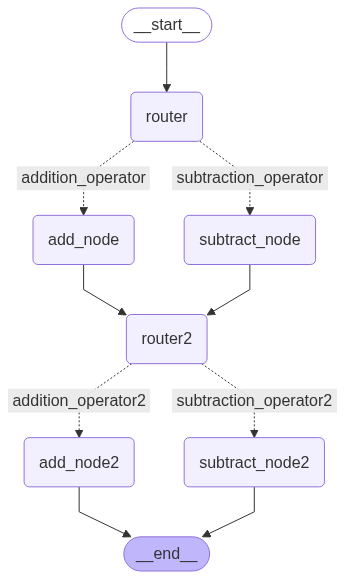

In [72]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [73]:
initial_state = AgentState(number1 = 10, operator="-", number2 = 5, number3 = 7, operator2="+", number4=2, final_number= 0, final_number2 = 0)
print(app.invoke(initial_state))


{'number1': 10, 'operator': '-', 'number2': 5, 'number3': 7, 'operator2': '+', 'number4': 2, 'final_number': 5, 'final_number2': 9}
